# Google Stock Price Train

In [58]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from datetime import datetime

In [59]:
# Đọc data
url = 'Google_Stock_Price_Train.csv'
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


# Xử lý data 

In [62]:
# Convert the date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Extract year, month, and day as separate features
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

# Remove the original date column
data = data.drop('Date', axis=1)

In [63]:
# data['Close'] = data['Close'].str.replace(',', '').astype(float)
# data['Volume'] = data['Volume'].str.replace(',', '').astype(float)


data[['Close', 'Volume']] = data[['Close', 'Volume']].apply(lambda x: x.str.replace(',', '').astype(float))


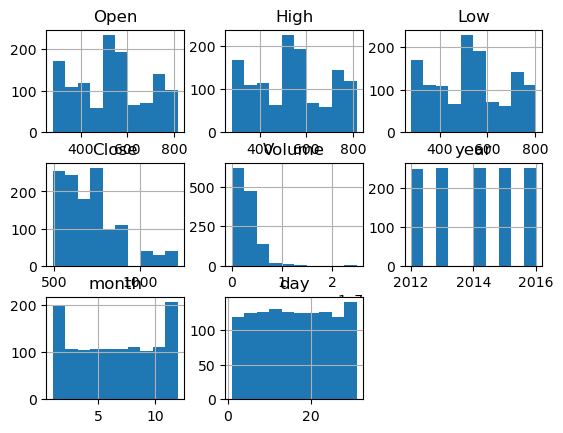

In [65]:
data.hist();

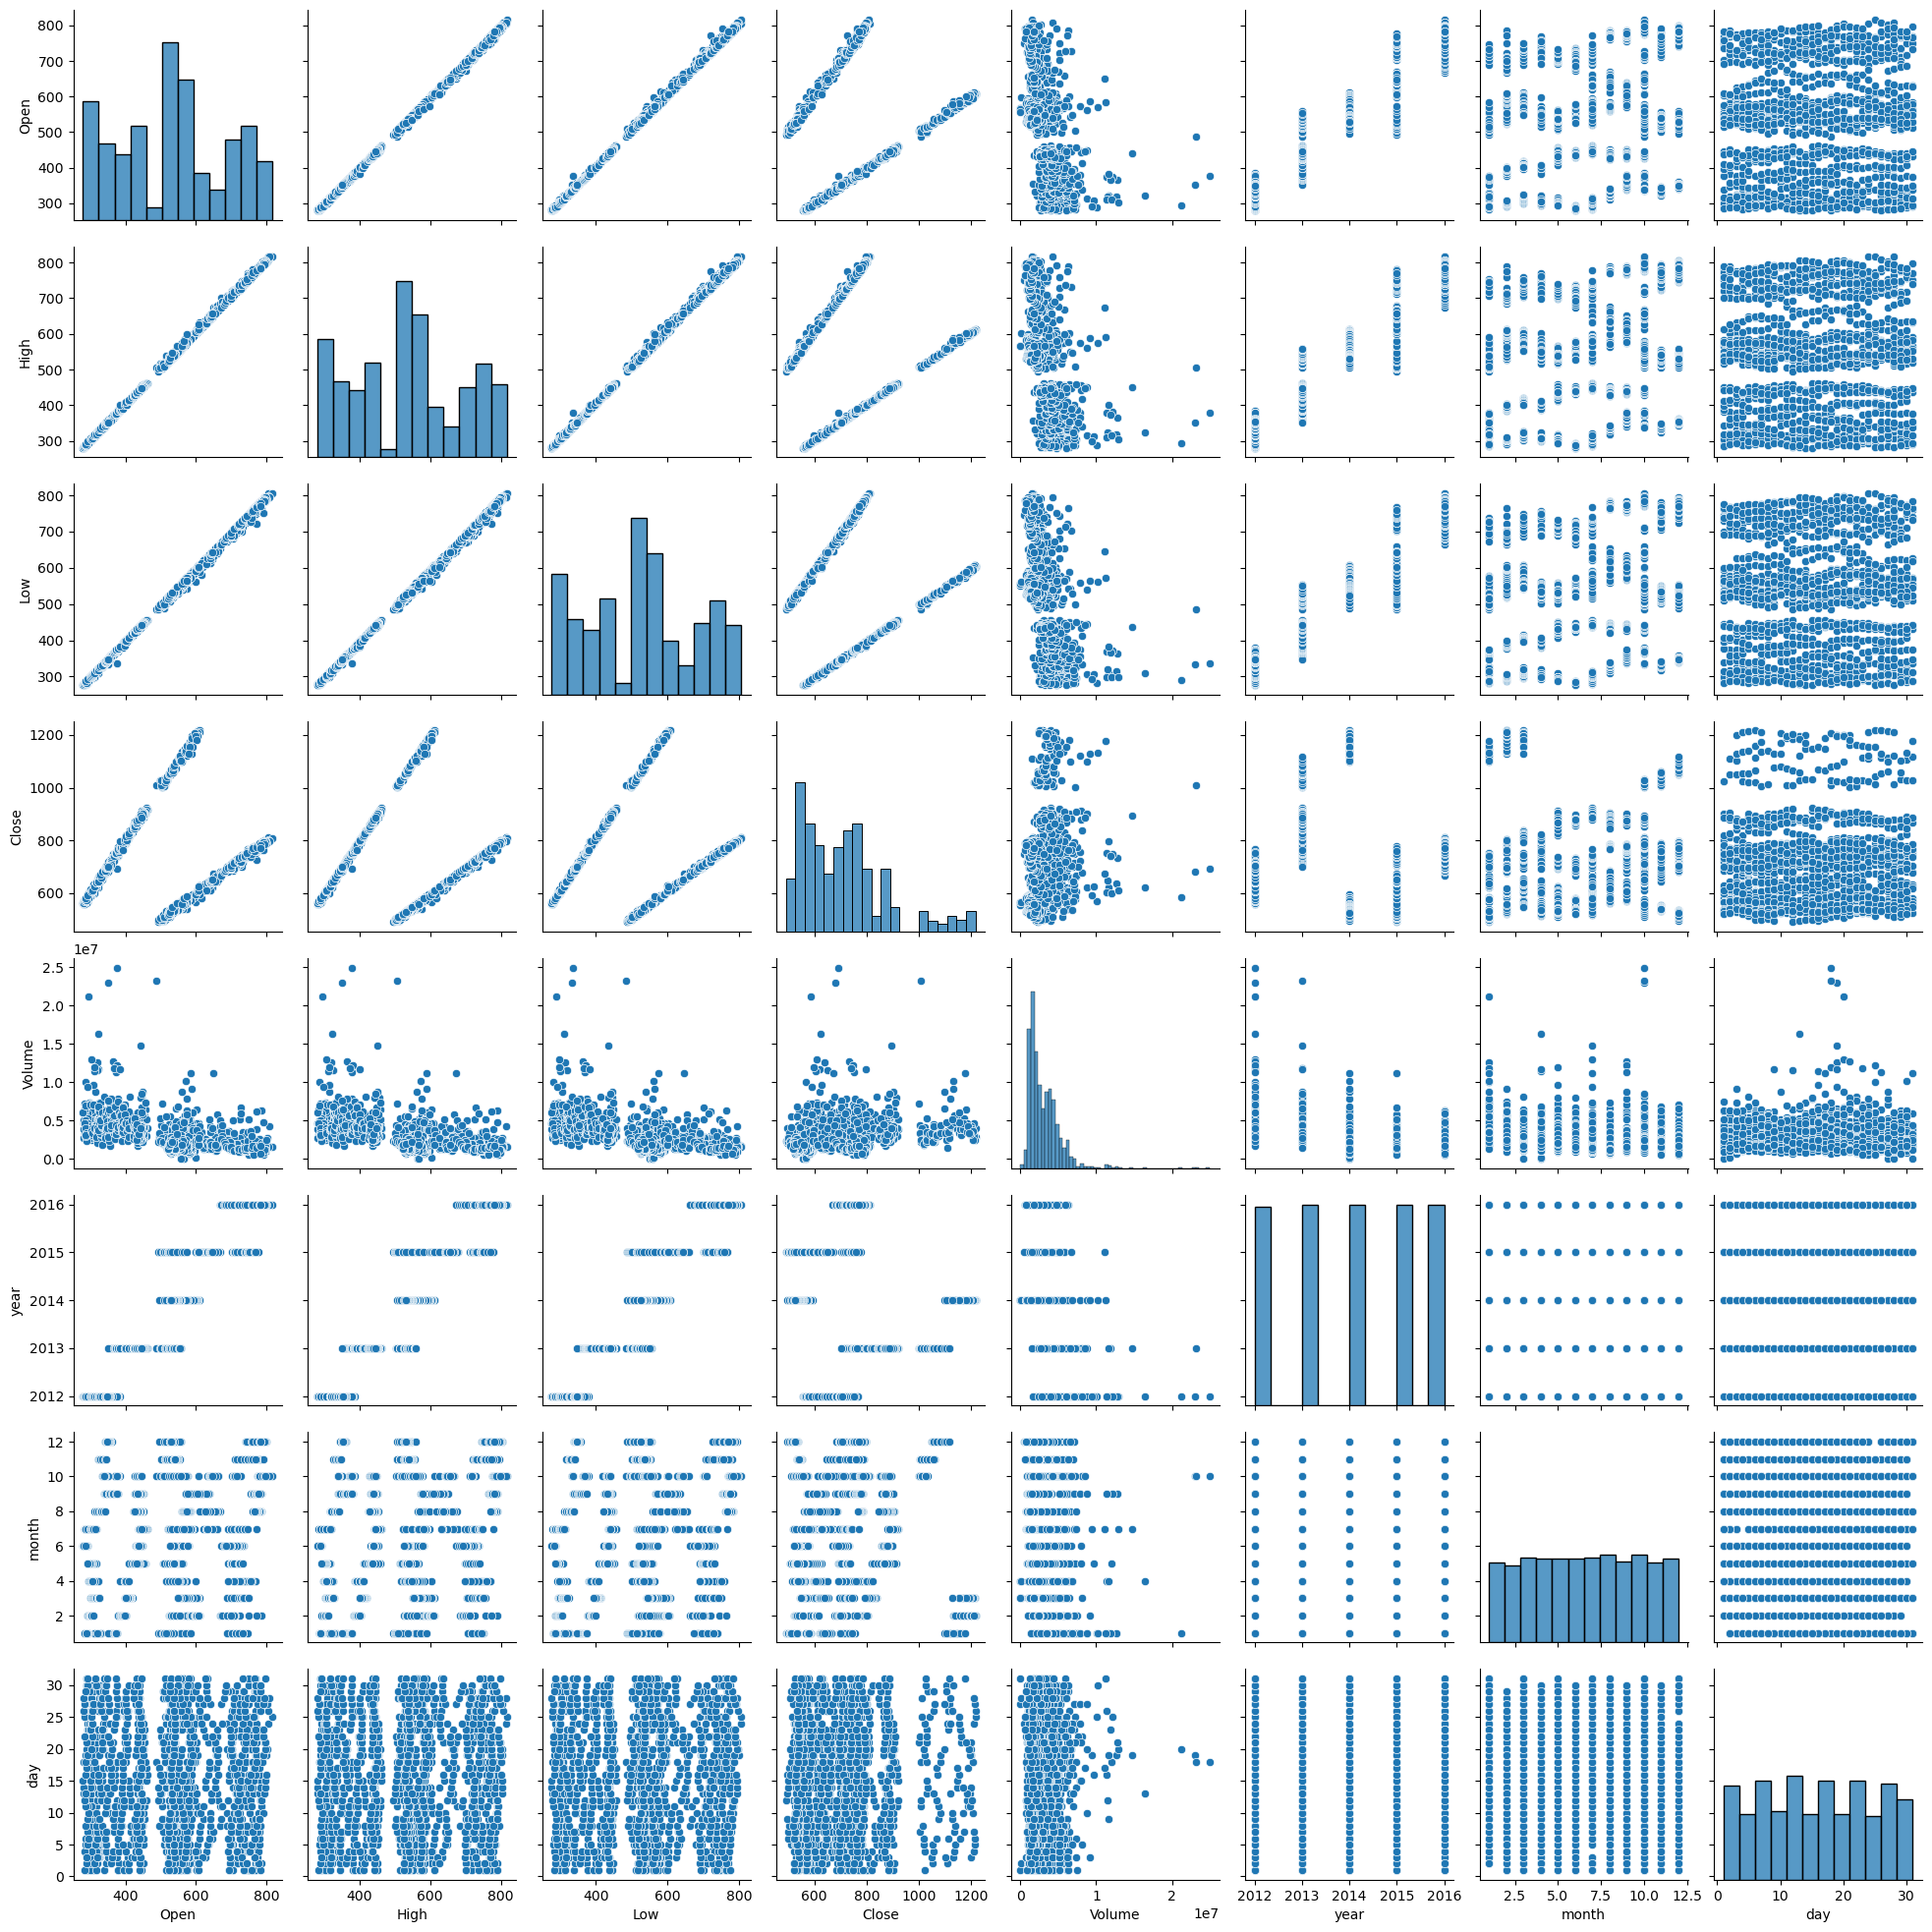

In [71]:
sns.pairplot(data);

# Xét tính tương quang để lọc bớt data

In [64]:
data.corr()

,Open,High,Low,Close,Volume,year,month,day
Open,1.000000,0.999692,0.999498,0.125832,-0.530506,0.938797,0.199195,0.016727
High,0.999692,1.000000,0.999480,0.124351,-0.526936,0.939461,0.198486,0.016491
Low,0.999498,0.999480,1.000000,0.129001,-0.538273,0.938323,0.201693,0.017575
Close,0.125832,0.124351,0.129001,1.000000,0.192357,-0.065500,0.035321,0.015504
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000,-0.553874,-0.181501,0.043703
year,0.938797,0.939461,0.938323,-0.065500,-0.553874,1.000000,0.005555,-0.001411
month,0.199195,0.198486,0.201693,0.035321,-0.181501,0.005555,1.000000,-0.005670
day,0.016727,0.016491,0.017575,0.015504,0.043703,-0.001411,-0.005670,1.000000


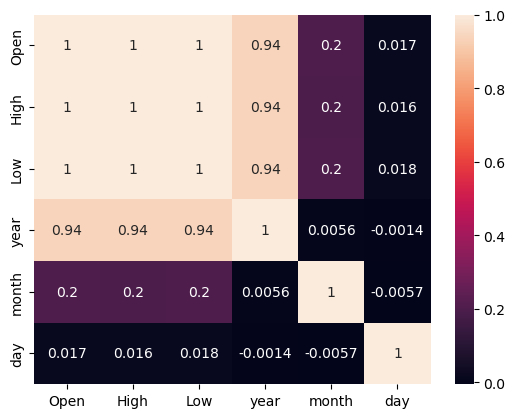

In [48]:
sns.heatmap(data.corr(), annot = True);

# Tiến hành train và đánh giá model

### Thử với bậc 1

In [87]:
X = data.loc[:,['Open','High','Low','Close','year','month','day']]
y = data['Volume']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  960120865.7768203
Hệ só coeffiient là:  [  -5166.7176206   182577.76988864 -184433.14881502    3677.68866729
 -475311.87961039  -63556.15071938   14681.41255147]
Hệ số độ chính xác:  0.517183887138702


### Thử với bậc 2

In [91]:
X = pd.DataFrame([data['Open'], data['Open']**2,
                  data['High'],data['High']**2,
                 data['Low'], data['Low']**2,
                data['Close'], data['Close']**2,
                data['year'], data['year']**2,
                data['month'], data['month']**2,
                data['day'], data['day']**2,  
                 ]).T
y = data['Volume']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  353663543842.94965
Hệ só coeffiient là:  [ 6.90135655e+04 -5.29562070e+01  7.42356780e+05 -4.53353659e+02
 -8.32452797e+05  5.25725400e+02  1.39113099e+04 -6.16872139e+00
 -3.50765694e+08  8.69727728e+04 -2.01708020e+05  8.84349013e+03
  6.01884705e+04 -1.55183007e+03]
Hệ số độ chính xác:  0.6279087510725568


# Thử với bậc 3
- Cải thiện độ chính xác hơn $\approx$ **4%**

In [92]:
X = pd.DataFrame([data['Open'], data['Open']**2, data['Open']**3,
                  data['High'],data['High']**2, data['High']**3,
                 data['Low'], data['Low']**2, data['Low']**3,
                data['Close'], data['Close']**2, data['Close']**3,
                data['year'], data['year']**2, data['year']**3,
                data['month'], data['month']**2, data['month']**3,
                data['day'], data['day']**2, data['day']**3,  
                 ]).T
y = data['Volume']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  911008226465229.0
Hệ só coeffiient là:  [ 7.55103691e+05 -1.34612008e+03  7.61165685e-01  1.41351310e+06
 -1.69670349e+03  7.20976836e-01 -2.16662001e+06  3.04950723e+03
 -1.49092040e+00  1.63943334e+04 -8.18808298e+00  5.09166895e-04
 -1.35682409e+12  6.73602303e+08 -1.11471117e+05 -6.14341707e+05
  8.64417257e+04 -4.16343862e+03 -8.49329551e+04  9.35965966e+03
 -2.25658313e+02]
Hệ số độ chính xác:  0.6612824526283916


# Thử với bậc 5
- Với bậc 5 chỉ cải thiện một chút nhỏ so với bậc 3 nên chọn bậc 3 giảm thiểu rủi ro dính đến `over fitting`

In [93]:
X = pd.DataFrame([data['Open'], data['Open']**2, data['Open']**3, data['Open']**4, data['Open']**5,
                  data['High'],data['High']**2, data['High']**3,data['High']**4, data['High']**5,
                 data['Low'], data['Low']**2, data['Low']**3,data['Low']**4, data['Low']**5,
                data['Close'], data['Close']**2, data['Close']**3,data['Close']**4, data['Close']**5,
                data['year'], data['year']**2, data['year']**3, data['year']**4, data['year']**5,
                data['month'], data['month']**2, data['month']**3, data['month']**4, data['month']**5,
                data['day'], data['day']**2, data['day']**3,  data['day']**4, data['day']**5
                 ]).T
y = data['Volume']

model = linear_model.LinearRegression()
model.fit(X,y)
print("Hệ số intercept là: ", model.intercept_)
print('Hệ só coeffiient là: ',model.coef_)
print('Hệ số độ chính xác: ',model.score( X, y))

Hệ số intercept là:  40792588439908.164
Hệ só coeffiient là:  [ 2.56659291e+02  2.34485475e+03 -7.72774557e+00  9.22366614e-03
 -3.80787170e-06  3.32015331e+04  2.25016636e+03 -3.84658153e+00
  1.54838074e-03  3.53597125e-07  3.55033444e+04 -4.96014581e+03
  1.23881182e+01 -1.15677565e-02  3.73198371e-06 -1.77892178e+04
  1.11072892e+02 -1.84295406e-01  1.31197317e-04 -3.48079746e-08
 -2.45966303e-02 -4.95451248e+01 -4.98994979e+04  3.71557823e+01
 -7.37777434e-03 -3.39264392e+04 -6.61950961e+04  1.19843795e+04
 -6.38419307e+02  4.30284588e+00  2.97217295e+04 -3.08099558e+04
  4.18081374e+03 -1.86721133e+02  2.68319178e+00]
Hệ số độ chính xác:  0.6641160214507722
